# Desafío: Analizando Texto sobre Ciencia de Datos

En este ejemplo, hagamos un ejercicio sencillo que cubre todos los pasos de un proceso tradicional de ciencia de datos. No necesitas escribir ningún código, simplemente puedes hacer clic en las celdas a continuación para ejecutarlas y observar el resultado. Como desafío, se te anima a probar este código con datos diferentes.

## Objetivo

En esta lección, hemos estado discutiendo diferentes conceptos relacionados con la Ciencia de Datos. Vamos a intentar descubrir más conceptos relacionados haciendo un poco de **minería de texto**. Comenzaremos con un texto sobre Ciencia de Datos, extraeremos palabras clave de él y luego intentaremos visualizar el resultado.

Como texto, usaré la página sobre Ciencia de Datos de Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Paso 1: Obtener los Datos

El primer paso en todo proceso de ciencia de datos es obtener los datos. Usaremos la biblioteca `requests` para hacerlo:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Paso 2: Transformar los datos

El siguiente paso es convertir los datos en una forma adecuada para su procesamiento. En nuestro caso, hemos descargado el código fuente HTML de la página y necesitamos convertirlo en texto plano.

Hay muchas maneras de hacerlo. Usaremos el objeto [HTMLParser](https://docs.python.org/3/library/html.parser.html) integrado más sencillo de Python. Necesitamos crear una subclase de la clase `HTMLParser` y definir el código que recolectará todo el texto dentro de las etiquetas HTML, excepto las etiquetas `<script>` y `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Paso 3: Obtener información

El paso más importante es convertir nuestros datos en una forma de la que podamos extraer información. En nuestro caso, queremos extraer palabras clave del texto y determinar cuáles son más significativas.

Usaremos una biblioteca de Python llamada [RAKE](https://github.com/aneesha/RAKE) para la extracción de palabras clave. Primero, instalemos esta biblioteca en caso de que no esté presente:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


La funcionalidad principal está disponible desde el objeto `Rake`, que podemos personalizar utilizando algunos parámetros. En nuestro caso, estableceremos la longitud mínima de una palabra clave en 5 caracteres, la frecuencia mínima de una palabra clave en el documento en 3, y el número máximo de palabras en una palabra clave en 2. Siéntete libre de experimentar con otros valores y observar el resultado.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Obtuvimos una lista de términos junto con su grado de importancia asociado. Como puedes ver, las disciplinas más relevantes, como machine learning y big data, están presentes en la lista en las primeras posiciones.

## Paso 4: Visualizando el Resultado

Las personas interpretan mejor los datos en forma visual. Por lo tanto, a menudo tiene sentido visualizar los datos para extraer algunas conclusiones. Podemos usar la biblioteca `matplotlib` en Python para graficar una distribución simple de las palabras clave con su relevancia:


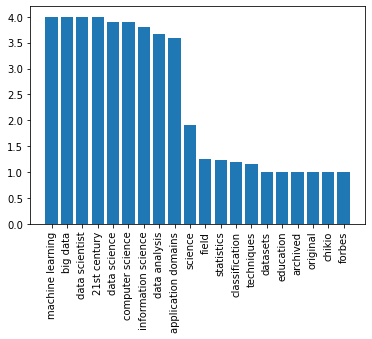

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Hay, sin embargo, una manera aún mejor de visualizar las frecuencias de palabras: usando **Word Cloud**. Necesitaremos instalar otra biblioteca para graficar la nube de palabras a partir de nuestra lista de palabras clave.


In [71]:
!{sys.executable} -m pip install wordcloud

El objeto `WordCloud` es responsable de tomar ya sea texto original, o una lista precomputada de palabras con sus frecuencias, y devuelve una imagen, que luego puede ser mostrada usando `matplotlib`:


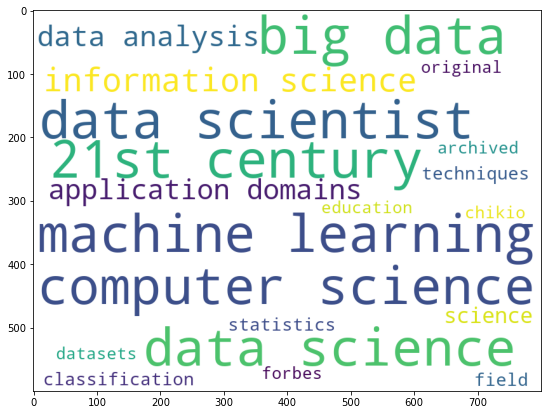

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

También podemos pasar el texto original a `WordCloud` - veamos si podemos obtener un resultado similar:


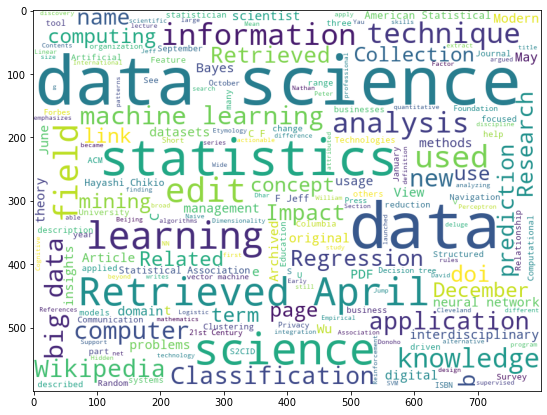

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Puedes ver que la nube de palabras ahora luce más impresionante, pero también contiene mucho ruido (por ejemplo, palabras no relacionadas como `Retrieved on`). Además, obtenemos menos palabras clave que consisten en dos palabras, como *data scientist* o *computer science*. Esto se debe a que el algoritmo RAKE hace un trabajo mucho mejor al seleccionar buenas palabras clave del texto. Este ejemplo ilustra la importancia de la preprocesamiento y limpieza de datos, ya que una imagen clara al final nos permitirá tomar mejores decisiones.

En este ejercicio hemos pasado por un proceso sencillo de extraer algo de significado de un texto de Wikipedia, en forma de palabras clave y nube de palabras. Este ejemplo es bastante simple, pero demuestra bien todos los pasos típicos que un científico de datos seguirá al trabajar con datos, comenzando desde la adquisición de datos hasta la visualización.

En nuestro curso discutiremos todos esos pasos en detalle.



---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Si bien nos esforzamos por garantizar la precisión, tenga en cuenta que las traducciones automatizadas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
